# Lab-5

Name: Purusharth Malik

Registration No.: 2348542

In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Plotting RGB images
def plot_image(img, title, og_im = cv2.cvtColor(cv2.imread('images/bird.png'), cv2.COLOR_BGR2RGB), og_title="Original Image"):    
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(og_im, cmap='gray')
    plt.title(og_title)
    plt.subplot(1, 2, 2)
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.show()

### Converting an Image into the Frequency Domain

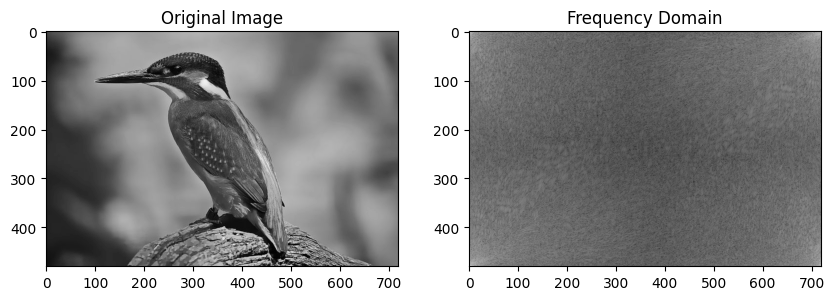

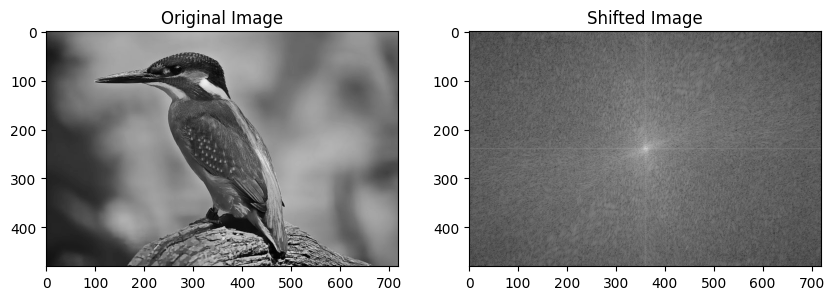

In [33]:
img = cv2.cvtColor(cv2.imread('images/bird.png'), cv2.COLOR_BGR2GRAY)

# Spatial Domain --> Frequency Domain
freq_im = np.fft.fft2(img)
shifted_freq = np.fft.fftshift(freq_im)

plot_image(np.log1p(np.abs(freq_im)), "Frequency Domain", og_im=img, og_title="Original Image")
plot_image(np.log1p(np.abs(shifted_freq)), "Shifted Image", og_im=img, og_title="Original Image")

### Ideal Low Pass Filter

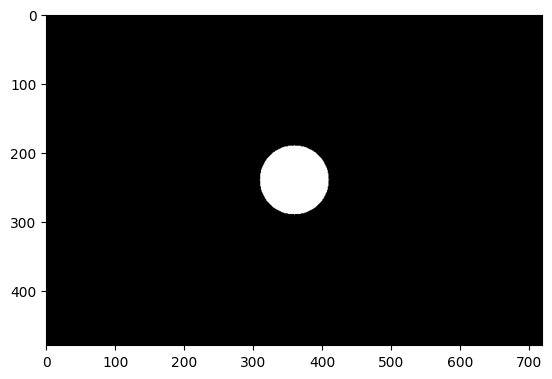

In [36]:
# Creating a low pass filter
low_pass = np.zeros(img.shape, dtype=np.float32)

# Any frequency above the threshold will be removed
threshold = 50

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        # Values below the threshold will be 1
        if np.sqrt((i-img.shape[0]/2)**2 + (j-img.shape[1]/2)**2) <= threshold:
            low_pass[i, j] = 1
         
# Plotting the filter
plt.imshow(low_pass, cmap='gray')
plt.show()

Any frequencies that fall outside the circle will get attenuated.

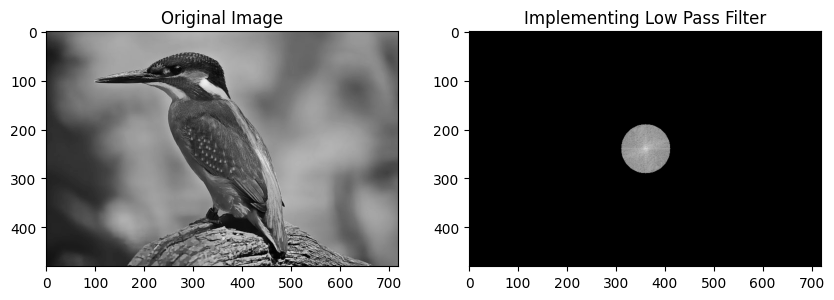

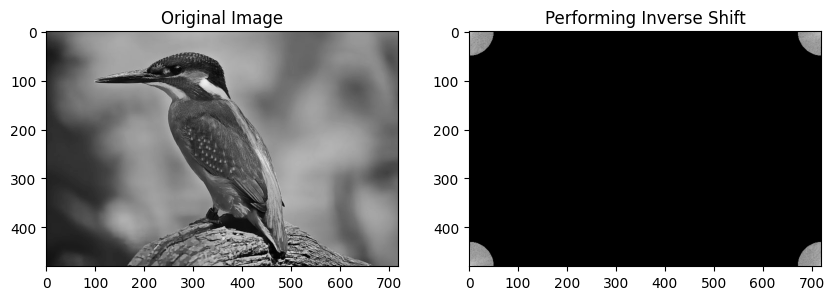

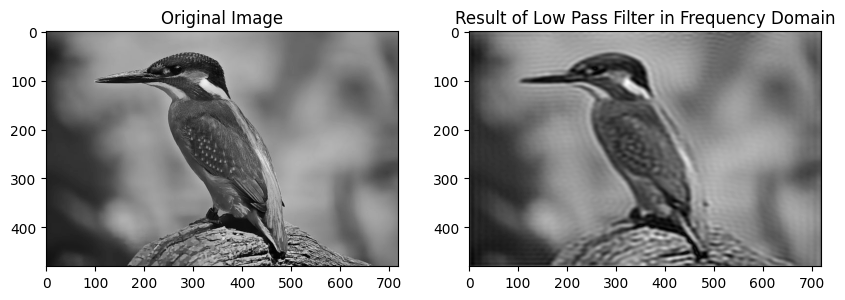

In [39]:
# Implementing the Low Pass Filter
low_freq = shifted_freq * low_pass
# Inverse Shifting
low_shift = np.fft.ifftshift(low_freq)
# Inverse Fourier Transform
low_img = np.fft.ifft2(low_shift)

# Plotting the results
plot_image(np.log1p(np.abs(low_freq)), "Implementing Low Pass Filter", og_im=img, og_title="Original Image")
plot_image(np.log1p(np.abs(low_shift)), "Performing Inverse Shift", og_im=img, og_title="Original Image")
plot_image(np.abs(low_img), "Result of Low Pass Filter in Frequency Domain", og_im=img, og_title="Original Image")

As we can see, the image has been blurred.

### Ideal High Pass Filter

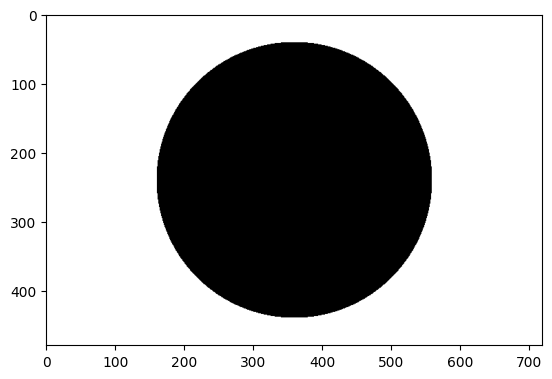

In [43]:
# Creating a high pass filter
high_pass = np.zeros(img.shape, dtype=np.float32)

# Any frequency below the threshold will be removed
threshold = 200

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        # Values above the threshold will be 1
        if np.sqrt((i-img.shape[0]/2)**2 + (j-img.shape[1]/2)**2) >= threshold:
            high_pass[i, j] = 1
         
# Plotting the filter
plt.imshow(high_pass, cmap='gray')
plt.show()

Any frequencies that fall inside the circle will get attenuated.

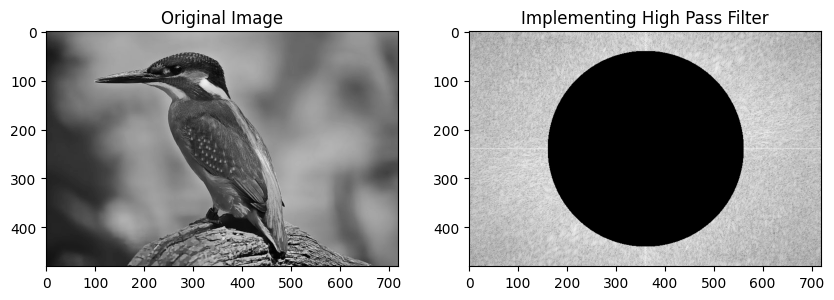

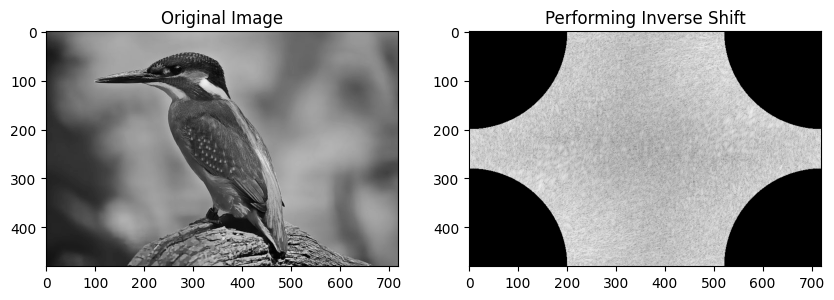

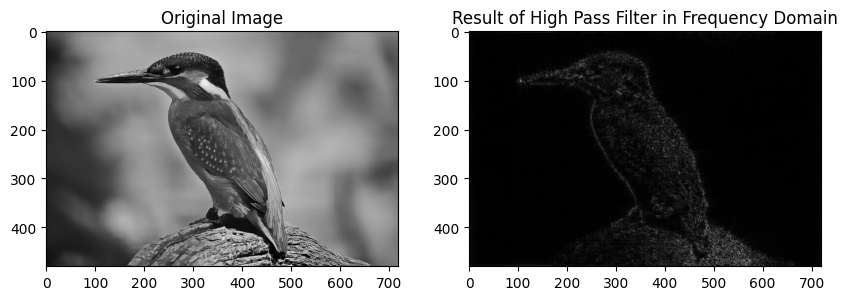

In [44]:
# Implementing the Low Pass Filter
high_freq = shifted_freq * high_pass
# Inverse Shifting
high_shift = np.fft.ifftshift(high_freq)
# Inverse Fourier Transform
high_img = np.fft.ifft2(high_shift)

# Plotting the results
plot_image(np.log1p(np.abs(high_freq)), "Implementing High Pass Filter", og_im=img, og_title="Original Image")
plot_image(np.log1p(np.abs(high_shift)), "Performing Inverse Shift", og_im=img, og_title="Original Image")
plot_image(np.abs(high_img), "Result of High Pass Filter in Frequency Domain", og_im=img, og_title="Original Image")

As we can see, the image has been sharped to the point where only the edges are visible.

# End